<a href="https://colab.research.google.com/github/qmpotential/MolVisual/blob/main/Hydrogen_atom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

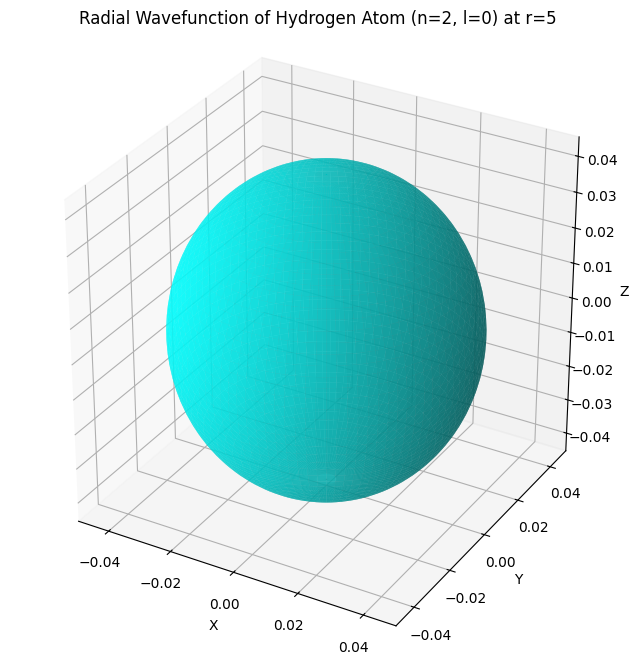

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
a0 = 1  # Bohr radius (in atomic units)

# Define the radial wavefunction for the hydrogen atom
def radial_wavefunction(r, n, l):
    if n == 1 and l == 0:
        return (2 / a0**(3/2)) * np.exp(-r/a0)
    elif n == 2 and l == 0:
        return (1 / (2 * np.sqrt(2))) * (1 - r/(2*a0)) * (1 / a0**(3/2)) * np.exp(-r/(2*a0))
    elif n == 2 and l == 1:
        return (1 / (2 * np.sqrt(6))) * (r / a0) * (1 / a0**(3/2)) * np.exp(-r/(2*a0))
    else:
        raise ValueError("This script only supports 1s, 2s, and 2p states.")

# Set parameters
n = 2  # Principal quantum number
l = 0  # Orbital quantum number (0 for s, 1 for p)
r = np.linspace(0, 10, 100)  # Range of r values

# Calculate the radial wavefunction
R = radial_wavefunction(r, n, l)

# Create a meshgrid for spherical coordinates
theta = np.linspace(0, 2 * np.pi, 100)  # Azimuthal angle
phi = np.linspace(0, np.pi, 50)          # Polar angle
theta_grid, phi_grid = np.meshgrid(theta, phi)

# Choose a radial distance to visualize the wavefunction
r_fixed = 5  # Fixed radial distance
R_fixed = radial_wavefunction(r_fixed, n, l)  # Calculate the wavefunction at this distance

# Convert spherical to Cartesian coordinates for plotting
X = R_fixed * np.sin(phi_grid) * np.cos(theta_grid)
Y = R_fixed * np.sin(phi_grid) * np.sin(theta_grid)
Z = R_fixed * np.cos(phi_grid)

# Set up the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='cyan', alpha=0.7, edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Radial Wavefunction of Hydrogen Atom (n={n}, l={l}) at r={r_fixed}')
ax.set_box_aspect([1, 1, 1])  # Aspect ratio is equal

plt.show()


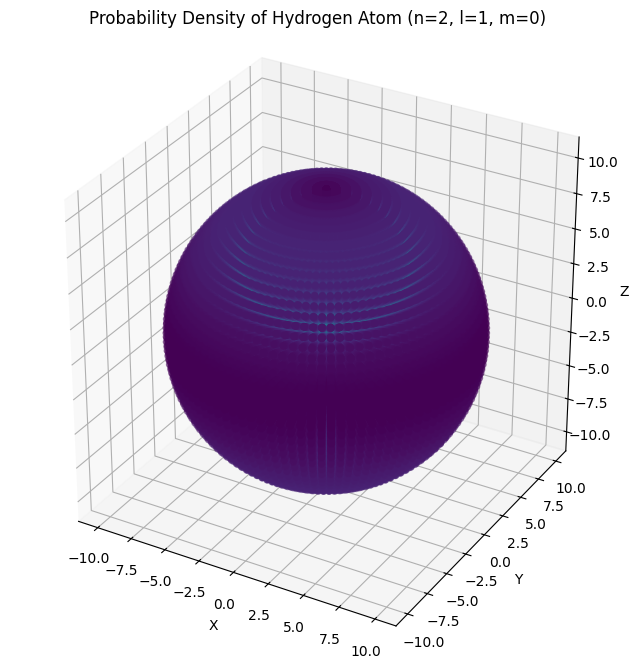

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
a0 = 1  # Bohr radius in atomic units

# Define the wavefunction for the hydrogen atom
def hydrogen_wavefunction(r, theta, phi, n, l, m):
    if n == 1 and l == 0 and m == 0:  # 1s
        return (1 / np.sqrt(np.pi)) * (1 / a0**(3/2)) * np.exp(-r/a0)
    elif n == 2 and l == 0 and m == 0:  # 2s
        return (1 / (4 * np.sqrt(2))) * (1 - r/(2*a0)) * (1 / a0**(3/2)) * np.exp(-r/(2*a0))
    elif n == 2 and l == 1 and m == -1:  # 2p
        return (1 / (4 * np.sqrt(6))) * (r / a0) * np.sqrt(2) * np.sin(theta) * np.exp(-r/(2*a0))
    elif n == 2 and l == 1 and m == 0:  # 2p
        return (1 / (4 * np.sqrt(6))) * (r / a0) * np.cos(theta) * np.exp(-r/(2*a0))
    elif n == 2 and l == 1 and m == 1:  # 2p
        return (1 / (4 * np.sqrt(6))) * (r / a0) * np.sqrt(2) * np.sin(theta) * np.exp(-r/(2*a0)) * np.exp(1j * phi)
    else:
        raise ValueError("This script supports only 1s, 2s, and 2p states.")

# Parameters
n = 2  # Principal quantum number
l = 1  # Orbital quantum number
m = 0  # Magnetic quantum number
r = np.linspace(0, 10, 100)  # Radial coordinate
theta = np.linspace(0, np.pi, 50)  # Polar angle
phi = np.linspace(0, 2 * np.pi, 100)  # Azimuthal angle

# Create a meshgrid for spherical coordinates
R, Theta, Phi = np.meshgrid(r, theta, phi)

# Calculate wavefunction
psi = hydrogen_wavefunction(R, Theta, Phi, n, l, m)

# Calculate probability density
probability_density = np.abs(psi)**2 * R**2 * np.sin(Theta)  # Include Jacobian for spherical coordinates

# Convert to Cartesian coordinates for plotting
X = R * np.sin(Theta) * np.cos(Phi)
Y = R * np.sin(Theta) * np.sin(Phi)
Z = R * np.cos(Theta)

# Set up the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), c=probability_density.flatten(), cmap='viridis', alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Probability Density of Hydrogen Atom (n={n}, l={l}, m={m})')
ax.set_box_aspect([1, 1, 1])  # Aspect ratio is equal

plt.show()


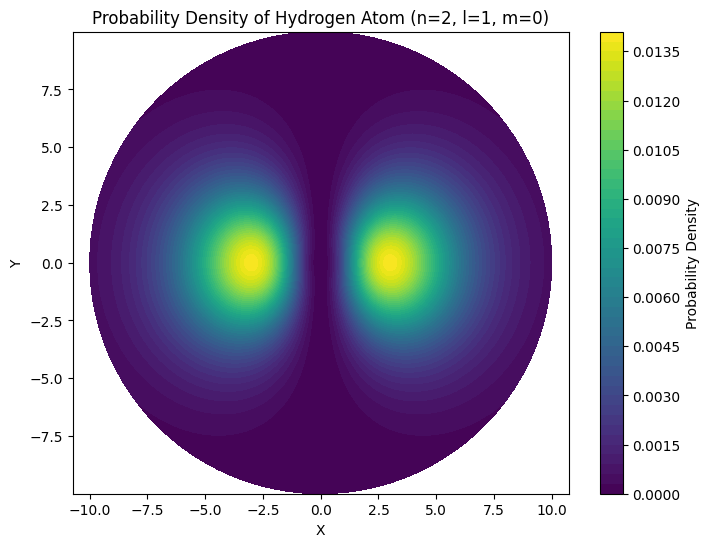

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
a0 = 1  # Bohr radius in atomic units

# Define the wavefunction for the hydrogen atom
def hydrogen_wavefunction(r, theta, n, l, m):
    if n == 1 and l == 0 and m == 0:  # 1s
        return (1 / np.sqrt(np.pi)) * (1 / a0**(3/2)) * np.exp(-r/a0)
    elif n == 2 and l == 0 and m == 0:  # 2s
        return (1 / (4 * np.sqrt(2))) * (1 - r/(2*a0)) * (1 / a0**(3/2)) * np.exp(-r/(2*a0))
    elif n == 2 and l == 1 and m == -1:  # 2p
        return (1 / (4 * np.sqrt(6))) * (r / a0) * np.sqrt(2) * np.sin(theta) * np.exp(-r/(2*a0))
    elif n == 2 and l == 1 and m == 0:  # 2p
        return (1 / (4 * np.sqrt(6))) * (r / a0) * np.cos(theta) * np.exp(-r/(2*a0))
    elif n == 2 and l == 1 and m == 1:  # 2p
        return (1 / (4 * np.sqrt(6))) * (r / a0) * np.sqrt(2) * np.sin(theta) * np.exp(-r/(2*a0)) * np.exp(1j * phi)
    else:
        raise ValueError("This script supports only 1s, 2s, and 2p states.")

# Parameters
n = 2  # Principal quantum number
l = 1  # Orbital quantum number
m = 0  # Magnetic quantum number

# Create a meshgrid for polar coordinates
r = np.linspace(0, 10, 100)  # Radial distance
theta = np.linspace(0, 2 * np.pi, 100)  # Azimuthal angle
R, Theta = np.meshgrid(r, theta)

# Calculate wavefunction
psi = hydrogen_wavefunction(R, Theta, n, l, m)

# Calculate probability density
probability_density = np.abs(psi)**2 * R  # Include Jacobian for polar coordinates

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(R * np.cos(Theta), R * np.sin(Theta), probability_density, levels=50, cmap='viridis')
plt.colorbar(label='Probability Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Probability Density of Hydrogen Atom (n={n}, l={l}, m={m})')
plt.axis('equal')  # Equal aspect ratio
plt.show()


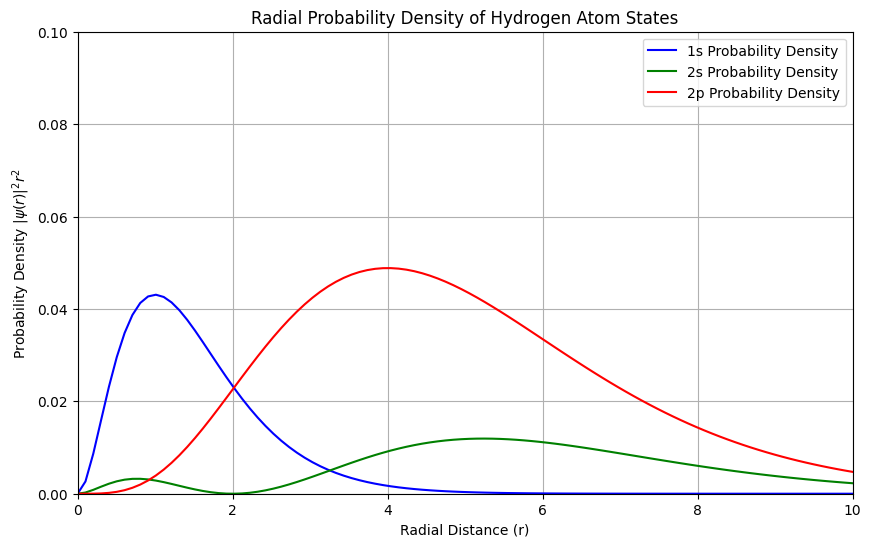

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
a0 = 1  # Bohr radius in atomic units

# Define the wavefunction for the hydrogen atom
def hydrogen_wavefunction(r, n, l, m):
    if n == 1 and l == 0 and m == 0:  # 1s
        return (1 / np.sqrt(np.pi)) * (1 / a0**(3/2)) * np.exp(-r/a0)
    elif n == 2 and l == 0 and m == 0:  # 2s
        return (1 / (4 * np.sqrt(2))) * (1 - r/(2*a0)) * (1 / a0**(3/2)) * np.exp(-r/(2*a0))
    elif n == 2 and l == 1 and m == 0:  # 2p
        return (1 / (4 * np.sqrt(6))) * (r / a0) * np.cos(0) * np.exp(-r/(2*a0))  # m=0 for simplicity
    else:
        raise ValueError("This script supports only 1s, 2s, and 2p states.")

# Radial distances
r = np.linspace(0, 10, 100)

# Calculate probability densities for different states
psi_1s = hydrogen_wavefunction(r, 1, 0, 0)
prob_density_1s = np.abs(psi_1s)**2 * r**2  # Include Jacobian for spherical coordinates

psi_2s = hydrogen_wavefunction(r, 2, 0, 0)
prob_density_2s = np.abs(psi_2s)**2 * r**2

psi_2p = hydrogen_wavefunction(r, 2, 1, 0)  # Using m=0 for 2p
prob_density_2p = np.abs(psi_2p)**2 * r**2

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r, prob_density_1s, label='1s Probability Density', color='blue')
plt.plot(r, prob_density_2s, label='2s Probability Density', color='green')
plt.plot(r, prob_density_2p, label='2p Probability Density', color='red')

plt.xlabel('Radial Distance (r)')
plt.ylabel('Probability Density $|\psi(r)|^2 r^2$')
plt.title('Radial Probability Density of Hydrogen Atom States')
plt.legend()
plt.grid()
plt.ylim(0, 0.1)  # Adjust this as needed for better visibility
plt.xlim(0, 10.0)  # Adjust this as needed for better visibility
plt.show()
